In [1]:
############
import pandas as pd
import numpy as np

In [2]:
trainData = pd.read_csv('F:\MSIS 2016\CIS8005\project\pvaBal35Trg.csv')

G:\Programming\MongoDB\ANA\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#####
We have 481 Columns with, 9999 standard rows in our data set, 
We are applying the Machine Learning Concepts on the whole dataset, I will like to just give us definitions of some key columns:
1.	MAJOR -  
2.	ZIPCODE – 
3.	DOMAIN – 
4.	GENDER – 
5.	MDMAUD -  

#####

In [3]:
trainData.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B
0,8601,FRC,2,FL,34284,NaN,NaN,1505,0.0,X,...,0,L,1,G,X,X,X,13.0,B,0
1,9501,HHH,0,IA,-51503,NaN,NaN,0,0.0,NaN,...,0,L,3,F,X,X,X,48.0,B,0
2,9401,L21,1,CA,96104,NaN,NaN,0,0.0,NaN,...,0,L,4,D,X,X,X,57.0,D,0
3,9301,BOA,1,CA,94707,NaN,NaN,4501,0.0,NaN,...,1,L,1,F,X,X,X,4.0,A,1
4,8601,AMB,2,CA,91301,NaN,NaN,6201,0.0,NaN,...,0,L,4,G,X,X,X,12.0,A,1


In [4]:
count = 0
for z in trainData.ZIP:
    if z < 0:
        count = count + 1
print (count)

530


In [5]:
trainData['ZIP'] = trainData['ZIP'].abs()

In [6]:
trainData['ZIP'].dtype

dtype('int64')

In [7]:
(trainData['ZIP'][0] // 10000)

3

In [8]:
trainData['ZIP1'] = (trainData['ZIP'] // 10000)

In [9]:
trainData['ZIP23'] = (trainData['ZIP'] %  10000) // 100

In [10]:
trainData.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B,ZIP1,ZIP23
0,8601,FRC,2,FL,34284,NaN,NaN,1505,0.0,X,...,1,G,X,X,X,13.0,B,0,3,42
1,9501,HHH,0,IA,51503,NaN,NaN,0,0.0,NaN,...,3,F,X,X,X,48.0,B,0,5,15
2,9401,L21,1,CA,96104,NaN,NaN,0,0.0,NaN,...,4,D,X,X,X,57.0,D,0,9,61
3,9301,BOA,1,CA,94707,NaN,NaN,4501,0.0,NaN,...,1,F,X,X,X,4.0,A,1,9,47
4,8601,AMB,2,CA,91301,NaN,NaN,6201,0.0,NaN,...,4,G,X,X,X,12.0,A,1,9,13


In [11]:
del trainData['ZIP']

In [12]:
trainData.DOMAIN.count()

9772

In [13]:
trainData['DOMAIN'].fillna('U4',inplace=True)

In [14]:
trainData.DOMAIN

0       C2
1       C3
2       R2
3       U1
4       C1
5       U4
6       S1
7       C1
8       C1
9       U3
10      T2
11      R1
12      U1
13      C1
14      S1
15      C1
16      U1
17      R3
18      S3
19      T2
20      S2
21      S1
22      S1
23      T2
24      T2
25      R3
26      T2
27      U1
28      C1
29      T2
        ..
9969    R3
9970    T1
9971    C2
9972    S1
9973    U3
9974    R2
9975    R2
9976    S2
9977    S1
9978    T3
9979    U4
9980    R2
9981    T2
9982    R2
9983    U4
9984    R2
9985    R2
9986    T2
9987    R2
9988    C3
9989    S2
9990    R2
9991    T1
9992    R2
9993    C1
9994    C1
9995    T1
9996    T2
9997    C1
9998    S1
Name: DOMAIN, dtype: object

In [15]:
print (trainData.count())  #### returns non null values of each column
print (trainData.shape)

ODATEDW     9999
OSOURCE     9877
TCODE       9999
STATE       9999
MAILCODE     142
PVASTATE     152
DOB         9999
NOEXCH      9993
RECINHSE     767
RECP3        271
RECPGVG       16
RECSWEEP     173
MDMAUD      9979
DOMAIN      9999
CLUSTER     9772
AGE         7522
AGEFLAG     6906
HOMEOWNR    7598
CHILD03      115
CHILD07      113
CHILD12      159
CHILD18      253
NUMCHLD     1263
INCOME      7730
GENDER      9700
WEALTH1     5336
HIT         9999
MBCRAFT     4516
MBGARDEN    4516
MBBOOKS     4516
            ... 
RAMNT_22    2253
RAMNT_23     870
RAMNT_24    1988
RAMNTALL    9999
NGIFTALL    9999
CARDGIFT    9999
MINRAMNT    9999
MINRDATE    9999
MAXRAMNT    9999
MAXRDATE    9999
LASTGIFT    9999
LASTDATE    9999
FISTDATE    9999
NEXTDATE    9072
TIMELAG     9072
AVGGIFT     9999
CONTROLN    9999
TARGET_D    9999
HPHONE_D    9999
RFA_2R      9999
RFA_2F      9999
RFA_2A      9999
MDMAUD_R    9982
MDMAUD_F    9988
MDMAUD_A    9996
CLUSTER2    9989
GEOCODE2    9973
TARGET_B    99

In [16]:
trainData.fillna(0,inplace=True)

In [17]:
print (trainData.count()) 

ODATEDW     9999
OSOURCE     9999
TCODE       9999
STATE       9999
MAILCODE    9999
PVASTATE    9999
DOB         9999
NOEXCH      9999
RECINHSE    9999
RECP3       9999
RECPGVG     9999
RECSWEEP    9999
MDMAUD      9999
DOMAIN      9999
CLUSTER     9999
AGE         9999
AGEFLAG     9999
HOMEOWNR    9999
CHILD03     9999
CHILD07     9999
CHILD12     9999
CHILD18     9999
NUMCHLD     9999
INCOME      9999
GENDER      9999
WEALTH1     9999
HIT         9999
MBCRAFT     9999
MBGARDEN    9999
MBBOOKS     9999
            ... 
RAMNT_22    9999
RAMNT_23    9999
RAMNT_24    9999
RAMNTALL    9999
NGIFTALL    9999
CARDGIFT    9999
MINRAMNT    9999
MINRDATE    9999
MAXRAMNT    9999
MAXRDATE    9999
LASTGIFT    9999
LASTDATE    9999
FISTDATE    9999
NEXTDATE    9999
TIMELAG     9999
AVGGIFT     9999
CONTROLN    9999
TARGET_D    9999
HPHONE_D    9999
RFA_2R      9999
RFA_2F      9999
RFA_2A      9999
MDMAUD_R    9999
MDMAUD_F    9999
MDMAUD_A    9999
CLUSTER2    9999
GEOCODE2    9999
TARGET_B    99

In [18]:
trainData.head()

,ODATEDW,OSOURCE,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B,ZIP1,ZIP23
0,8601,FRC,2,FL,0,0,1505,0.0,X,0,...,1,G,X,X,X,13.0,B,0,3,42
1,9501,HHH,0,IA,0,0,0,0.0,0,0,...,3,F,X,X,X,48.0,B,0,5,15
2,9401,L21,1,CA,0,0,0,0.0,0,0,...,4,D,X,X,X,57.0,D,0,9,61
3,9301,BOA,1,CA,0,0,4501,0.0,0,0,...,1,F,X,X,X,4.0,A,1,9,47
4,8601,AMB,2,CA,0,0,6201,0.0,0,0,...,4,G,X,X,X,12.0,A,1,9,13


In [19]:
trainData.GENDER.unique()

array([0, 'F', 'M', 'U', 'J', 'A'], dtype=object)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [21]:
import seaborn as sns

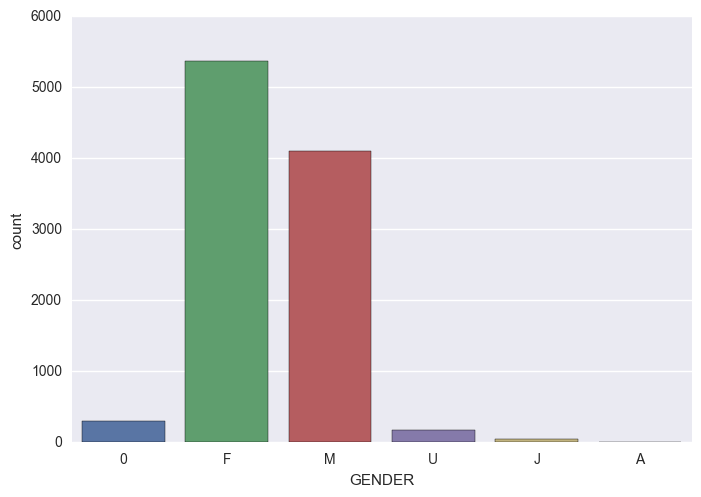

In [22]:
sns.countplot(x=trainData['GENDER'],data=trainData)

In [23]:
trainData.ix[trainData.GENDER == 0, 'GENDER'] = 'U'

In [24]:
trainData.GENDER.unique()

array(['U', 'F', 'M', 'J', 'A'], dtype=object)

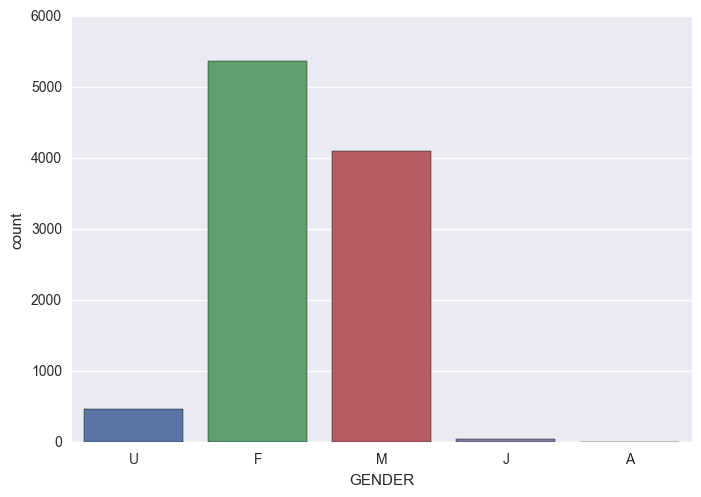

In [65]:
sns.countplot(x=trainData['GENDER'],data=trainData)

In [25]:
trainData.head()

,ODATEDW,OSOURCE,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,TARGET_B,ZIP1,ZIP23
0,8601,FRC,2,FL,0,0,1505,0.0,X,0,...,1,G,X,X,X,13.0,B,0,3,42
1,9501,HHH,0,IA,0,0,0,0.0,0,0,...,3,F,X,X,X,48.0,B,0,5,15
2,9401,L21,1,CA,0,0,0,0.0,0,0,...,4,D,X,X,X,57.0,D,0,9,61
3,9301,BOA,1,CA,0,0,4501,0.0,0,0,...,1,F,X,X,X,4.0,A,1,9,47
4,8601,AMB,2,CA,0,0,6201,0.0,0,0,...,4,G,X,X,X,12.0,A,1,9,13


In [26]:
trainData.MAJOR.unique()

array([0, 'X'], dtype=object)

In [27]:
trainData.ix[trainData.MAJOR == 'X', 'MAJOR'] = 1

In [28]:
trainData.MAJOR.unique()

array([0, 1], dtype=object)

In [29]:
trainData.MDMAUD.unique()

array(['XXXX', 0, 'C1CM'], dtype=object)

In [30]:
trainData.ix[trainData.MDMAUD == 'XXXX', 'MDMAUD'] = 0
trainData.ix[trainData.MDMAUD == 'C1CM', 'MDMAUD'] = 1

In [31]:
trainData.MDMAUD.unique()

array([0, 1], dtype=object)

In [32]:
trainData = trainData.drop(['ODATEDW','OSOURCE','TCODE','NOEXCH','AGEFLAG','DATASRCE','SOLP3','SOLIH','GEOCODE','COLLECT1'],axis = 1)

In [33]:
trainData = trainData.drop(['BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 
                            'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 
                            'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC'],axis = 1)

In [34]:
trainData = trainData.drop(['CARDPROM', 'MINRAMNT', 'MINRDATE' , 'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 
                            'NEXTDATE', 'TIMELAG', 'CONTROLN', 'HPHONE_D', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 
                            'CLUSTER2', 'GEOCODE2' , 'PVASTATE' , 'RECINHSE' , 'RECP3' , 'RECPGVG', 
                            'RECSWEEP' , 'CLUSTER' , 'HIT' , 'PEPSTRFL' , 'AFC1', 'AFC1' , 'NUMPRM12' 
                            , 'NGIFTALL' , 'CARDGIFT'],axis = 1)

In [35]:
trainData = trainData.drop(['AGE901','AGE902','AGE903','AGE904','AGE905','AGE906','AGE907', 'CHIL1','CHIL2' ,'CHIL3',
                            'AGEC1','AGEC2','AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1','CHILC2',
                            'CHILC3','CHILC4','CHILC5', 'HHAGE1','HHAGE2','HHAGE3', 'HHN1','HHN2','HHN3','HHN4','HHN5',
                            'HHN6', 'MARR1','MARR2','MARR3','MARR4', 'HHP1', 'HHP2', 'DW1','DW2','DW3','DW4','DW5',
                            'DW6','DW7','DW8','DW9','HU1','HU2','HU3','HU4','HU5', 'HHD1','HHD2','HHD3','HHD4','HHD5',
                            'HHD6','HHD7','HHD8','HHD9','HHD10','HHD11','HHD12', 'ETHC1','ETHC2','ETHC3','ETHC4','ETHC5',
                            'ETHC6','HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HUR1', 'HUR2', 
                            'RHP1','RHP2','RHP3'],axis = 1)

In [36]:
trainData.head()

,STATE,MAILCODE,DOB,MDMAUD,DOMAIN,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,...,RAMNTALL,MAXRAMNT,AVGGIFT,TARGET_D,RFA_2R,RFA_2F,RFA_2A,TARGET_B,ZIP1,ZIP23
0,FL,0,1505,0,C2,83.0,0,0,0,0,...,1422.00,100.0,33.857143,0.0,L,1,G,0,3,42
1,IA,0,0,0,C3,0.0,U,0,0,0,...,40.00,15.0,10.000000,0.0,L,3,F,0,5,15
2,CA,0,0,0,R2,0.0,H,0,0,0,...,62.00,9.0,7.750000,0.0,L,4,D,0,9,61
3,CA,0,4501,0,U1,53.0,H,0,0,0,...,41.00,20.0,13.666667,20.0,L,1,F,1,9,47
4,CA,0,6201,0,C1,36.0,H,0,0,0,...,311.07,60.0,8.887714,11.0,L,4,G,1,9,13


In [37]:
trainData.shape

(9999, 347)

In [38]:
trainData.corr()['TARGET_B']

DOB         0.005962
AGE         0.035548
NUMCHLD    -0.025793
INCOME      0.021444
WEALTH1     0.011282
MBCRAFT     0.017879
MBGARDEN    0.006004
MBBOOKS     0.003872
MBCOLECT    0.000701
MAGFAML     0.004496
MAGFEM      0.001825
MAGMALE     0.006063
PUBGARDN   -0.000187
PUBCULIN   -0.003114
PUBHLTH     0.022179
PUBDOITY   -0.003611
PUBNEWFN    0.007843
PUBPHOTO   -0.004589
PUBOPP      0.006539
MALEMILI   -0.005648
MALEVET     0.022506
VIETVETS   -0.030419
WWIIVETS    0.030363
LOCALGOV   -0.012199
STATEGOV    0.007095
FEDGOV     -0.015706
WEALTH2     0.044130
POP901     -0.012083
POP902     -0.010521
POP903     -0.008046
              ...   
RAMNT_3     0.027665
RAMNT_4     0.013552
RAMNT_5    -0.000467
RAMNT_6     0.012985
RAMNT_7    -0.018004
RAMNT_8     0.031656
RAMNT_9     0.003837
RAMNT_10   -0.024234
RAMNT_11   -0.006142
RAMNT_12   -0.007466
RAMNT_13    0.023834
RAMNT_14    0.031918
RAMNT_15    0.029682
RAMNT_16   -0.027612
RAMNT_17   -0.006438
RAMNT_18    0.028367
RAMNT_19    0

In [39]:
good_columns = trainData[['ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8',
                         'ETH9','ETH10','ETH11','ETH12','ETH13','ETH14','ETH15','ETH16','EIC1','EIC2','EIC3',
                         'EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11',
                         'EIC12','EIC13','EIC14','EIC15','EIC16']]

trainData = trainData.drop(['ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8',
                         'ETH9','ETH10','ETH11','ETH12','ETH13','ETH14','ETH15','ETH16','EIC1','EIC2','EIC3',
                         'EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11',
                         'EIC12','EIC13','EIC14','EIC15','EIC16'],axis = 1)

print (good_columns)

      ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ...    \
0        0     0     0     0     0     0     0     0     0      0  ...     
1       97     1     1     0     4     0     0     0     0      0  ...     
2       92     0     4     0     8     0     0     0     0      0  ...     
3       85     3     0    11     4     0     5     4     1      0  ...     
4       89     2     0     8     4     1     1     3     0      2  ...     
5       96     1     0     2     1     0     0     0     0      0  ...     
6       93     4     0     2     2     1     0     0     0      1  ...     
7       88     2     1     2    16     0     1     0     0      0  ...     
8       86    10     0     3     1     2     0     1     0      1  ...     
9       63     1     0     7    74     0     1     2     1      1  ...     
10      94     2     0     2     5     0     0     1     0      0  ...     
11      80    19     0     1     1     0     0     0     0      0  ...     
12      97  

In [40]:
trainData.shape

(9999, 315)

In [41]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_4 = PCA(n_components=4)
# Fit the PCA model on the numeric columns from earlier.
after_pca = pca_4.fit(good_columns)

In [42]:
print (after_pca.explained_variance_ratio_)
print (after_pca.components_)
print (after_pca.n_components)

[ 0.42756916  0.20657251  0.07981853  0.06240213]
[[  8.05123600e-01  -5.27202172e-01  -9.88645306e-03  -8.05761078e-02
   -1.95977759e-01  -2.08914517e-03  -1.54743584e-02  -1.82209522e-02
   -2.08823007e-02  -5.81691547e-03  -5.05608475e-03  -6.73161448e-03
   -1.52637254e-01  -6.90704897e-03  -5.02069318e-03  -3.19378296e-02
    1.04679770e-02   3.85566270e-03   1.38585229e-02   1.80349207e-02
   -1.03464445e-02   1.87057907e-03   1.06139085e-02   2.29547431e-02
    2.64643148e-02  -6.04539225e-03  -2.05619157e-02   3.52342519e-03
    1.82761305e-03   2.63455655e-03   2.10895592e-02  -1.75953385e-02]
 [  2.76720158e-02  -4.02523895e-01   4.57472026e-03   7.72599036e-02
    7.06909643e-01   2.20985633e-03   9.46954742e-03   1.63626215e-02
    2.39701811e-02   5.77231600e-03   7.00067865e-03   1.79102379e-03
    5.57166573e-01   1.12668736e-02   3.78410855e-02   1.02056190e-01
    4.19079310e-02   5.87695186e-03   1.90945003e-02  -5.14139348e-02
    6.44442920e-04  -1.08121115e-03   1

In [43]:
after_pca_transform = after_pca.transform(good_columns)

In [44]:
after_pca_transform

array([[-63.39991296,  -7.47374972,  23.73671361, -32.36096893],
       [ 14.09249547,  -1.49843459, -12.52047647,  -3.20604328],
       [  8.88827853,   5.51390276,   5.56112883,   5.24225985],
       ..., 
       [  9.05594854,   1.36629868,   1.55122962,   1.94428865],
       [-36.71782886, -10.79000023,   8.10766846,  -1.14269931],
       [ 17.05214162,  -4.53217088,   7.57371684,   4.10103073]])

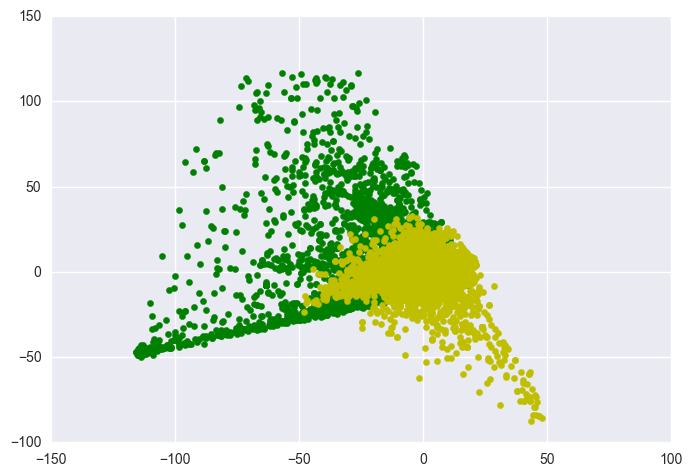

In [45]:
# we are plotting pc1,pc2,pc3,pc4 in the graph.
after_pca_transform.shape
plt.scatter(x=after_pca_transform[:,0], y=after_pca_transform[:,1], color="g")
plt.scatter(x=after_pca_transform[:,2], y=after_pca_transform[:,3], color="y")
# Show the plot.
plt.show()

In [46]:
pca_columns = ['pca1','pca2','pca3','pca4']
df2 = pd.DataFrame(data=after_pca_transform, columns=pca_columns)

In [47]:
newTrain = trainData.merge(df2,how='inner', left_index=True, right_index=True)

In [48]:
print (newTrain.head())

  STATE MAILCODE   DOB MDMAUD DOMAIN   AGE HOMEOWNR CHILD03 CHILD07 CHILD12  \
0    FL        0  1505      0     C2  83.0        0       0       0       0   
1    IA        0     0      0     C3   0.0        U       0       0       0   
2    CA        0     0      0     R2   0.0        H       0       0       0   
3    CA        0  4501      0     U1  53.0        H       0       0       0   
4    CA        0  6201      0     C1  36.0        H       0       0       0   

     ...     RFA_2R  RFA_2F  RFA_2A TARGET_B  ZIP1  ZIP23       pca1  \
0    ...          L       1       G        0     3     42 -63.399913   
1    ...          L       3       F        0     5     15  14.092495   
2    ...          L       4       D        0     9     61   8.888279   
3    ...          L       1       F        1     9     47   2.333558   
4    ...          L       4       G        1     9     13   6.547728   

       pca2       pca3       pca4  
0 -7.473750  23.736714 -32.360969  
1 -1.498435 -12.5204

In [49]:
newTrain.head()

,STATE,MAILCODE,DOB,MDMAUD,DOMAIN,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,...,RFA_2R,RFA_2F,RFA_2A,TARGET_B,ZIP1,ZIP23,pca1,pca2,pca3,pca4
0,FL,0,1505,0,C2,83.0,0,0,0,0,...,L,1,G,0,3,42,-63.399913,-7.473750,23.736714,-32.360969
1,IA,0,0,0,C3,0.0,U,0,0,0,...,L,3,F,0,5,15,14.092495,-1.498435,-12.520476,-3.206043
2,CA,0,0,0,R2,0.0,H,0,0,0,...,L,4,D,0,9,61,8.888279,5.513903,5.561129,5.242260
3,CA,0,4501,0,U1,53.0,H,0,0,0,...,L,1,F,1,9,47,2.333558,-1.310165,15.264777,-3.856945
4,CA,0,6201,0,C1,36.0,H,0,0,0,...,L,4,G,1,9,13,6.547728,-1.611965,7.629917,-5.392445


In [50]:
target = newTrain['TARGET_B']

In [51]:
data = newTrain.drop('TARGET_B',axis = 1)

In [52]:
data.head()

,STATE,MAILCODE,DOB,MDMAUD,DOMAIN,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,...,TARGET_D,RFA_2R,RFA_2F,RFA_2A,ZIP1,ZIP23,pca1,pca2,pca3,pca4
0,FL,0,1505,0,C2,83.0,0,0,0,0,...,0.0,L,1,G,3,42,-63.399913,-7.473750,23.736714,-32.360969
1,IA,0,0,0,C3,0.0,U,0,0,0,...,0.0,L,3,F,5,15,14.092495,-1.498435,-12.520476,-3.206043
2,CA,0,0,0,R2,0.0,H,0,0,0,...,0.0,L,4,D,9,61,8.888279,5.513903,5.561129,5.242260
3,CA,0,4501,0,U1,53.0,H,0,0,0,...,20.0,L,1,F,9,47,2.333558,-1.310165,15.264777,-3.856945
4,CA,0,6201,0,C1,36.0,H,0,0,0,...,11.0,L,4,G,9,13,6.547728,-1.611965,7.629917,-5.392445


In [53]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_B, dtype: int64

In [54]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size = 0.2, random_state = 4)

In [55]:
print (data.shape)
print(target.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(9999, 318)
(9999,)
(7999, 318)
(7999,)
(2000, 318)
(2000,)


In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [57]:
for i in range(len(X_train)-1):
    X_train.iloc[:,i] = le.fit_transform(X_train.iloc[:,i].factorize()[0])
    print(X_train.iloc[:,i])

G:\Programming\MongoDB\ANA\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4983     0
6789     1
2221     2
6043     2
1564     2
5608     0
7139     3
8108     4
8018     5
4171     4
423      6
1068     7
8100     8
9016     6
8069     4
6979     9
6930     7
3978     6
446     10
6054    11
5722     5
2673     4
5442     9
3752    12
228     13
6322    13
484      2
1618    14
9820     5
2540    14
        ..
1440    22
6487     2
3002     8
3633    23
3720     4
1054    19
4270     2
4802     2
8248    13
5606    11
3785     3
8341     1
2581     6
4279     2
9216    38
9603    31
1588    19
8170    19
7212    23
9138     6
7844    18
3678     2
8039    14
9274    17
6962     2
456     38
6017     5
709     12
8366     6
1146     4
Name: STATE, dtype: int64
4983    0
6789    0
2221    0
6043    0
1564    0
5608    0
7139    0
8108    0
8018    0
4171    0
423     0
1068    0
8100    0
9016    0
8069    0
6979    0
6930    0
3978    0
446     0
6054    1
5722    0
2673    0
5442    0
3752    0
228     0
6322    0
484     0
1618    0
9820    0
2540    0
   

IndexError: single positional indexer is out-of-bounds

In [58]:
for i in range(len(X_test)-1):
    X_test.iloc[:,i] = le.fit_transform(X_test.iloc[:,i].factorize()[0])
    print(X_test.iloc[:,i])

G:\Programming\MongoDB\ANA\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1603     0
8713     1
4561     1
6600     2
2558     3
7642     4
8911     5
3319     6
6852     7
1366     8
3123     9
262     10
4951    11
1314    12
7132     4
9037    11
5253    13
596      0
7811     9
187      6
5511    14
7360     1
8286    15
3450     2
4435    10
3904    16
8798    17
5584     9
1913     9
3722     6
        ..
6863     3
6572     2
6898    16
9962    27
2211    10
2073    23
587     30
983      2
5237     2
4273    28
2882    21
1318     9
6716     9
1344    32
7306    19
8622    11
3852    15
6252     4
2938    32
2753    13
107      2
1141     9
3370    34
5287     9
2646     9
1944     1
5978     9
9808    10
4014     7
5652     8
Name: STATE, dtype: int64
1603    0
8713    0
4561    0
6600    0
2558    0
7642    0
8911    0
3319    0
6852    0
1366    0
3123    0
262     0
4951    0
1314    0
7132    0
9037    0
5253    0
596     0
7811    0
187     0
5511    0
7360    0
8286    0
3450    0
4435    1
3904    0
8798    0
5584    0
1913    0
3722    0
   

IndexError: single positional indexer is out-of-bounds

In [59]:
X_test.dtypes

STATE       int64
MAILCODE    int64
DOB         int64
MDMAUD      int64
DOMAIN      int64
AGE         int64
HOMEOWNR    int64
CHILD03     int64
CHILD07     int64
CHILD12     int64
CHILD18     int64
NUMCHLD     int64
INCOME      int64
GENDER      int64
WEALTH1     int64
MBCRAFT     int64
MBGARDEN    int64
MBBOOKS     int64
MBCOLECT    int64
MAGFAML     int64
MAGFEM      int64
MAGMALE     int64
PUBGARDN    int64
PUBCULIN    int64
PUBHLTH     int64
PUBDOITY    int64
PUBNEWFN    int64
PUBPHOTO    int64
PUBOPP      int64
MALEMILI    int64
            ...  
RAMNT_8     int64
RAMNT_9     int64
RAMNT_10    int64
RAMNT_11    int64
RAMNT_12    int64
RAMNT_13    int64
RAMNT_14    int64
RAMNT_15    int64
RAMNT_16    int64
RAMNT_17    int64
RAMNT_18    int64
RAMNT_19    int64
RAMNT_20    int64
RAMNT_21    int64
RAMNT_22    int64
RAMNT_23    int64
RAMNT_24    int64
RAMNTALL    int64
MAXRAMNT    int64
AVGGIFT     int64
TARGET_D    int64
RFA_2R      int64
RFA_2F      int64
RFA_2A      int64
ZIP1      

In [60]:
X_test.head()

,STATE,MAILCODE,DOB,MDMAUD,DOMAIN,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,...,TARGET_D,RFA_2R,RFA_2F,RFA_2A,ZIP1,ZIP23,pca1,pca2,pca3,pca4
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8713,1,0,1,0,1,1,1,0,0,0,...,0,0,0,1,1,1,1,1,1,1
4561,1,0,2,0,2,2,1,0,0,0,...,1,0,1,1,1,2,2,2,2,2
6600,2,0,3,0,3,3,0,1,0,0,...,2,0,2,2,2,3,3,3,3,3
2558,3,0,4,0,4,4,0,0,0,0,...,3,0,3,2,3,4,4,4,4,4


In [61]:
X_train.head()

,STATE,MAILCODE,DOB,MDMAUD,DOMAIN,AGE,HOMEOWNR,CHILD03,CHILD07,CHILD12,...,TARGET_D,RFA_2R,RFA_2F,RFA_2A,ZIP1,ZIP23,pca1,pca2,pca3,pca4
4983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6789,1,0,1,0,1,1,1,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2221,2,0,2,0,2,2,1,0,0,0,...,1,0,2,0,1,2,2,2,2,2
6043,2,0,3,0,3,3,0,0,0,0,...,0,0,1,2,1,3,3,3,3,3
1564,2,0,4,0,4,4,2,0,0,0,...,2,0,3,1,1,4,4,4,4,4


In [62]:
print (data.shape)
print(target.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(9999, 318)
(9999,)
(7999, 318)
(7999,)
(2000, 318)
(2000,)


In [63]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train,y_train)

Y_pred=logreg.predict(X_test)
print(Y_pred,len(Y_pred))

[0 0 1 ..., 0 1 0] 2000


In [64]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, Y_pred))

0.937
